In [16]:
## LIBRARIES
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split


randomseed = 1234

## DATA LOADING AND PREPROCESSING
# Load the data
gym = pd.read_csv('../../gym_members_exercise_tracking.csv')

# set 'Gender', 'Workout_Type', 'Workout_Frequency (days/week)' and 'Experience_Level' as categorical
for col in ['Gender', 'Workout_Type', 'Workout_Frequency (days/week)', 'Experience_Level']:
    gym[col] = gym[col].astype('category')

# log transform Weight and BMI
gym['Weight (kg)'] = np.log1p(gym['Weight (kg)'])

# transform 'Fat_Percentage'
max_fat = gym['Fat_Percentage'].max()
gym['Fat_Percentage'] = gym['Fat_Percentage'].apply(lambda x: np.sqrt(max_fat+1)-x)

# rename transformed columns
gym.rename(columns={'Weight (kg)': 'LWeight', 'Fat_Percentage': 'SFat_Percentage'}, inplace=True)

gym.drop(columns=['BMI'], inplace=True)

# divide into train and test set
gym_train, gym_test = train_test_split(gym, test_size=0.2, random_state=randomseed)

# Create gym_train_scale, gym_test_scale
gym_train_scale = gym_train.copy()
gym_test_scale = gym_test.copy()

# Scale the data (normalize it)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
gym_train_scale[['LWeight', 'Height (m)', 'Max_BPM', 'Avg_BPM', 'Resting_BPM', 'Session_Duration (hours)',
                             'Water_Intake (liters)', 'SFat_Percentage', 'Workout_Frequency (days/week)', 'Calories_Burned']] = scaler.fit_transform(gym_train_scale[['LWeight', 'Height (m)', 'Max_BPM', 'Avg_BPM', 'Resting_BPM', 'Session_Duration (hours)',
                             'Water_Intake (liters)', 'SFat_Percentage', 'Workout_Frequency (days/week)', 'Calories_Burned']])

gym_test_scale[['LWeight', 'Height (m)', 'Max_BPM', 'Avg_BPM', 'Resting_BPM', 'Session_Duration (hours)',
                             'Water_Intake (liters)', 'SFat_Percentage', 'Workout_Frequency (days/week)', 'Calories_Burned']] = scaler.transform(gym_test_scale[['LWeight', 'Height (m)', 'Max_BPM', 'Avg_BPM', 'Resting_BPM', 'Session_Duration (hours)',
                             'Water_Intake (liters)', 'SFat_Percentage', 'Workout_Frequency (days/week)', 'Calories_Burned']])


# Create X_train_exp_level, X_test_exp_level, y_train_exp_level, y_test_exp_level
X_train_exp_level = gym_train.drop(columns=['Experience_Level'])
X_train_exp_level_scale = gym_train_scale.drop(columns=['Experience_Level'])
y_train_exp_level = gym_train['Experience_Level']
X_test_exp_level = gym_test.drop(columns=['Experience_Level'])
X_test_exp_level_scale = gym_test_scale.drop(columns=['Experience_Level'])
y_test_exp_level = gym_test['Experience_Level']

print(gym_train_scale[:5])
print("Data loaded and preprocessed")

     Age  Gender   LWeight  Height (m)   Max_BPM   Avg_BPM  Resting_BPM  \
718   51    Male  1.732749   -0.442354  0.803855 -0.363075    -0.973629   
811   27    Male  0.807793    1.104394 -0.941851  0.604770    -0.007099   
366   42    Male  0.244305    1.877768 -1.290992  0.881297     0.407128   
737   34    Male  1.732749    0.640370  0.105573  1.572615     0.683280   
813   34  Female -0.686524   -0.829041 -0.156283  0.397374    -0.835554   

     Session_Duration (hours)  Calories_Burned Workout_Type  SFat_Percentage  \
718                  0.352920         0.135895         Yoga         0.075177   
811                  1.066710         1.664510     Strength         1.951007   
366                 -0.360871        -0.100985         HIIT         0.315668   
737                  0.293437         1.242568         Yoga         0.059144   
813                 -0.390612        -0.245334       Cardio        -0.966951   

     Water_Intake (liters)  Workout_Frequency (days/week) Experience

In [17]:
# Create X_train_calories, X_test_calories, y_train_calories, y_test_calories

X_train_calories = pd.get_dummies(gym_train.drop(columns=['Calories_Burned']), drop_first=True)
#drop calories burned du data set train de variables explicatives et via get.dummies transforme les variables qualitatives en indicatrices
X_train_calories_scale = pd.get_dummies(gym_train_scale.drop(columns=['Calories_Burned']), drop_first=True)
#pareil mais en normalisé
y_train_calories = gym_train['Calories_Burned'] #variable à prédire
X_test_calories = pd.get_dummies(gym_test.drop(columns=['Calories_Burned']), drop_first=True)   #pareil pour le test
X_test_calories_scale = pd.get_dummies(gym_test_scale.drop(columns=['Calories_Burned']), drop_first=True) #normalisation pour le test
y_test_calories = gym_test['Calories_Burned'] #variable à prédire




In [18]:
X_train_calories_numeric = X_train_calories.select_dtypes(include=[np.number])  # sélectionne uniquement les colonnes numériques
X_test_calories_numeric = X_test_calories.select_dtypes(include=[np.number])  # sélectionne uniquement les colonnes numériques

# Normalisation des données
X_train_calories_scaled = scaler.fit_transform(X_train_calories)
X_test_calories_scaled = scaler.transform(X_test_calories)


In [19]:
display(gym_train.head().style.background_gradient(cmap='YlGnBu', low=0, high=0, axis=0))
# display unique values of categorical columns
display(gym_train.info())
for col in gym_train.select_dtypes(include='category').columns:
    print(col, gym_train[col].unique())

,Age,Gender,LWeight,Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,SFat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level
718,51,Male,4.756173,1.670000,189,139,55,1.380000,950.000000,Yoga,-18.400000,2.500000,3,2
811,27,Male,4.503137,1.870000,169,153,62,1.620000,1363.000000,Strength,-6.700000,3.500000,5,3
366,42,Male,4.348987,1.970000,165,157,65,1.140000,886.000000,HIIT,-16.900000,2.600000,3,2
737,34,Male,4.756173,1.810000,181,167,67,1.360000,1249.000000,Yoga,-18.500000,2.200000,2,1
813,34,Female,4.094345,1.620000,178,150,56,1.130000,847.000000,Cardio,-24.900000,2.400000,4,2


<class 'pandas.core.frame.DataFrame'>
Index: 778 entries, 718 to 815
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   Age                            778 non-null    int64   
 1   Gender                         778 non-null    category
 2   LWeight                        778 non-null    float64 
 3   Height (m)                     778 non-null    float64 
 4   Max_BPM                        778 non-null    int64   
 5   Avg_BPM                        778 non-null    int64   
 6   Resting_BPM                    778 non-null    int64   
 7   Session_Duration (hours)       778 non-null    float64 
 8   Calories_Burned                778 non-null    float64 
 9   Workout_Type                   778 non-null    category
 10  SFat_Percentage                778 non-null    float64 
 11  Water_Intake (liters)          778 non-null    float64 
 12  Workout_Frequency (days/week)  778 non-

None

Gender ['Male', 'Female']
Categories (2, object): ['Female', 'Male']
Workout_Type ['Yoga', 'Strength', 'HIIT', 'Cardio']
Categories (4, object): ['Cardio', 'HIIT', 'Strength', 'Yoga']
Workout_Frequency (days/week) [3, 5, 2, 4]
Categories (4, int64): [2, 3, 4, 5]
Experience_Level [2, 3, 1]
Categories (3, int64): [1, 2, 3]


R²: 0.9784825037136762
MSE: 1679.5412626974564
Coefficients du modèle :  [-4.19977341e+01  2.29759699e+00  2.03255278e+00 -1.06264166e+00
  9.03212133e+01  2.55059915e+00  2.44242855e+02  2.03381013e+00
 -7.57451047e-01  4.12188909e+01 -7.54953418e-01 -4.76075478e-01
 -3.44856168e+00 -9.28352252e-01  9.97555344e-01  2.58109228e+00
 -1.07904607e-02 -2.86359397e+00]
Intercept du modèle :  913.284061696658


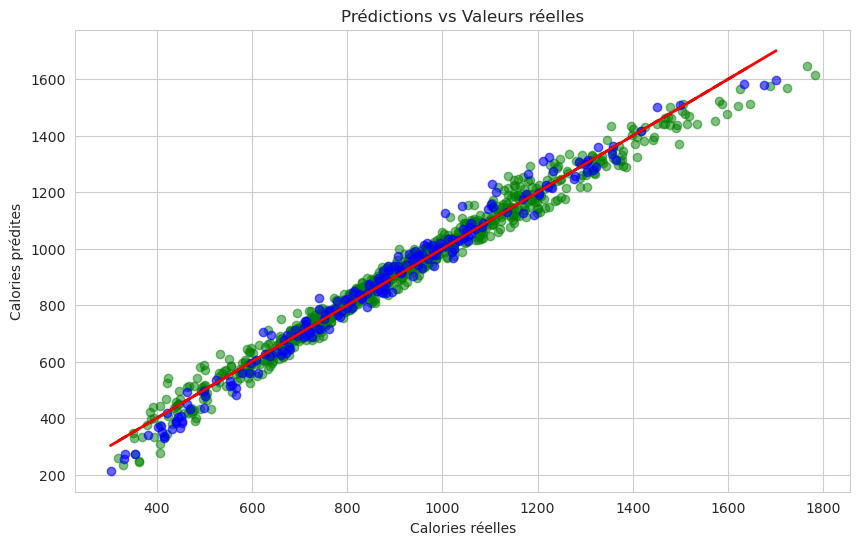

In [20]:
# 1. Importer les bibliothèques nécessaires
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 2. Créer un modèle de régression linéaire
model = LinearRegression()

# 3. Entraîner le modèle sur les données d'entraînement
model.fit(X_train_calories_scaled, y_train_calories)

# 4. Faire des prédictions sur l'échantillon de test (X_test_scaled)
y_pred_calories = model.predict(X_test_calories_scaled)
y_pred_train_calories = model.predict(X_train_calories_scaled)
y_pred_test_calories = model.predict(X_test_calories_scaled)
# 5. Évaluer la performance du modèle
# Coefficient de détermination R²
r2 = r2_score(y_test_calories, y_pred_calories)
print(f"R²: {r2}")

# Erreur quadratique moyenne (MSE)
mse = mean_squared_error(y_test_calories, y_pred_calories)
print(f"MSE: {mse}")

# 6. Afficher les coefficients du modèle
print("Coefficients du modèle : ", model.coef_)
print("Intercept du modèle : ", model.intercept_)

plt.figure(figsize=(10, 6))
plt.scatter(y_train_calories, y_pred_train_calories, color='green', alpha=0.5, label='scikit-learn Regression Predictions')
plt.plot([y_train_calories.min(), y_pred_train_calories.max()], [y_train_calories.min(), y_pred_train_calories.max()], 'k--', lw=2)
plt.scatter(y_test_calories, y_pred_calories, color='blue', alpha=0.6)
plt.plot([y_test_calories.min(), y_test_calories.max()], [y_test_calories.min(), y_test_calories.max()], color='red', lw=2)  # Ligne idéale
plt.xlabel("Calories réelles")
plt.ylabel("Calories prédites")
plt.title("Prédictions vs Valeurs réelles")
plt.show()




### Performances du modèle

R² = 0.978 :
Le modèle explique 97.8% de la variance des calories brûlées. Cette valeur exceptionnellement élevée pourrait indiquer un surapprentissage (overfitting), surtout si le modèle a beaucoup de variables (18 coefficients ici).
On remarque également que les points verts (entraînement) et bleus (test) semblent bien alignés, ce qui suggère une bonne performance globale du modèle. Toutefois, pour obtenir une analyse complète, il faudrait tracer résidus vs prédictions pour vérifier la répartition uniforme des résidus.

In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.metrics import make_scorer, mean_squared_error

# Define the model
ridge = Ridge()

# Define the parameter grid
param_grid = {
    'alpha': [0.1, 1, 10, 100, 1000],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
}

# Define the scoring metric
scorer = make_scorer(mean_squared_error, greater_is_better=False)

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=ridge, param_grid=param_grid, scoring=scorer, cv=5, verbose=3, n_jobs=-1)
grid_search.fit(X_train_calories_scaled, y_train_calories)

# Display the best parameters and score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_}")

# Use the best estimator to make predictions
best_model = grid_search.best_estimator_
y_pred_grid = best_model.predict(X_test_calories_scaled)

# Evaluate the model
mse_grid = mean_squared_error(y_test_calories, y_pred_grid)
print(f"Mean Squared Error (MSE) on test data: {mse_grid}")

Fitting 5 folds for each of 35 candidates, totalling 175 fits
[CV 3/5] END ........alpha=0.1, solver=auto;, score=-1734.513 total time=   0.0s[CV 2/5] END ........alpha=0.1, solver=auto;, score=-1805.045 total time=   0.0s
[CV 4/5] END ........alpha=0.1, solver=auto;, score=-1682.667 total time=   0.0s
[CV 1/5] END ........alpha=0.1, solver=auto;, score=-1464.186 total time=   0.0s

[CV 5/5] END ........alpha=0.1, solver=auto;, score=-1531.351 total time=   0.0s
[CV 1/5] END .........alpha=0.1, solver=svd;, score=-1464.186 total time=   0.0s
[CV 2/5] END .........alpha=0.1, solver=svd;, score=-1805.045 total time=   0.0s
[CV 3/5] END .........alpha=0.1, solver=svd;, score=-1734.513 total time=   0.0s
[CV 4/5] END .........alpha=0.1, solver=svd;, score=-1682.667 total time=   0.0s
[CV 5/5] END .........alpha=0.1, solver=svd;, score=-1531.351 total time=   0.0s
[CV 1/5] END ....alpha=0.1, solver=cholesky;, score=-1464.186 total time=   0.0s
[CV 2/5] END ....alpha=0.1, solver=cholesky;, s

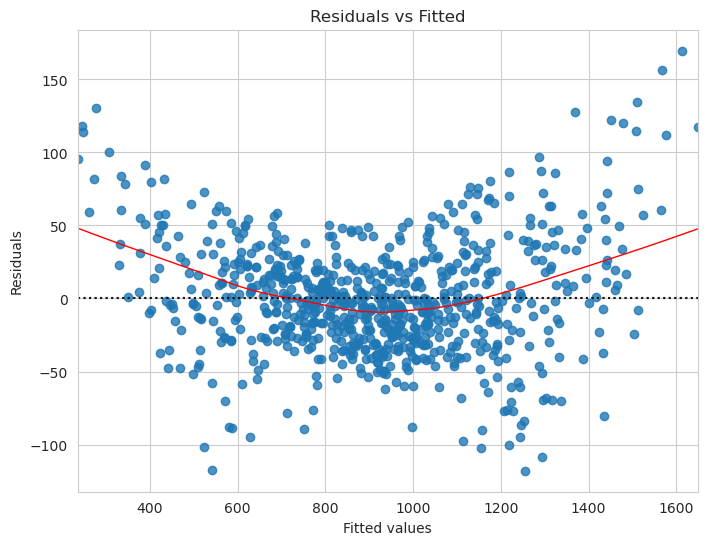

In [13]:


import matplotlib.pyplot as plt
import seaborn as sns

# Calcul des résidus
residuals_train = y_train_calories - y_pred_train_calories
residuals_test = y_test_calories - y_pred_test_calories

# Création d'une seule figure
plt.figure(figsize=(8, 6))  # Ajuste la taille selon tes besoins

# 1. Résidus vs Valeurs ajustées
sns.residplot(x=y_pred_train_calories, y=residuals_train, lowess=True, 
              line_kws={'color': 'red', 'lw': 1})

# Ajout de la ligne horizontale à zéro
plt.axhline(0, color='black', linestyle='dotted', alpha=0.6)

# Ajout des labels et du titre
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted")

# Affichage de la figure
plt.show()



La forme en banane dans le graphique des résidus (Residuals vs Fitted) révèle une non-linéarité non capturée par le modèle.Ce qui nous indique que la valeur du score R2 est trompeuse. En effet, le R^2 mesure la variance expliquée, pas la justesse des prédictions. Un modèle peut, donc, avoir un R² élevé tout en ayant des erreurs systématiques. Le modèle linéaire est inadéquat pour capturer la vraie relation dans les données, malgré un R² élevé. Ainsi, pour améliorer la généralisation du modèle et identifier les variables réellement influentes, une approche de régularisation s’impose. C’est ici que la régression Lasso (Least Absolute Shrinkage and Selection Operator) entre en jeu. 

Donc, maintenant, on a passer à l’implémentation de Lasso pour voir comment il améliore (ou non) la robustesse du modèle, malgré les limites structurelles de la linéarité.

In [14]:
# Vérifier les dimensions de X_train_calories et les coefficients
print("Shape of X_train_calories: ", X_train_calories.shape)
print("Number of coefficients: ", len(lasso.coef_))
import pandas as pd

# Vérifier la taille et les coefficients du modèle Lasso
print("Shape of X_train_calories: ", X_train_calories.shape)
print("Nombre de coefficients: ", len(lasso.coef_))

# Créer un DataFrame des coefficients
coeffs_df = pd.DataFrame({'Variable': X_train_calories.columns, 'Coefficient': lasso.coef_})

# Trier par valeur absolue des coefficients pour voir les plus importants
coeffs_df = coeffs_df.sort_values(by='Coefficient', key=abs, ascending=False)
print(coeffs_df)



Shape of X_train_calories:  (778, 18)


NameError: name 'lasso' is not defined

Optimal alpha: 0.8
Coefficients du modèle Lasso pour Calories Burned:
Age                                -41.155584
LWeight                              1.782447
Height (m)                           1.518002
Max_BPM                             -0.233361
Avg_BPM                             89.501680
Resting_BPM                          1.668190
Session_Duration (hours)           243.133973
SFat_Percentage                      0.811042
Water_Intake (liters)                0.000000
Gender_Male                         40.891185
Workout_Type_HIIT                   -0.000000
Workout_Type_Strength                0.000000
Workout_Type_Yoga                   -2.260688
Workout_Frequency (days/week)_3     -0.630447
Workout_Frequency (days/week)_4      0.000000
Workout_Frequency (days/week)_5      0.618403
Experience_Level_2                   0.000000
Experience_Level_3                   0.000000
dtype: float64
Lasso conserve 12 variables et en supprime 6


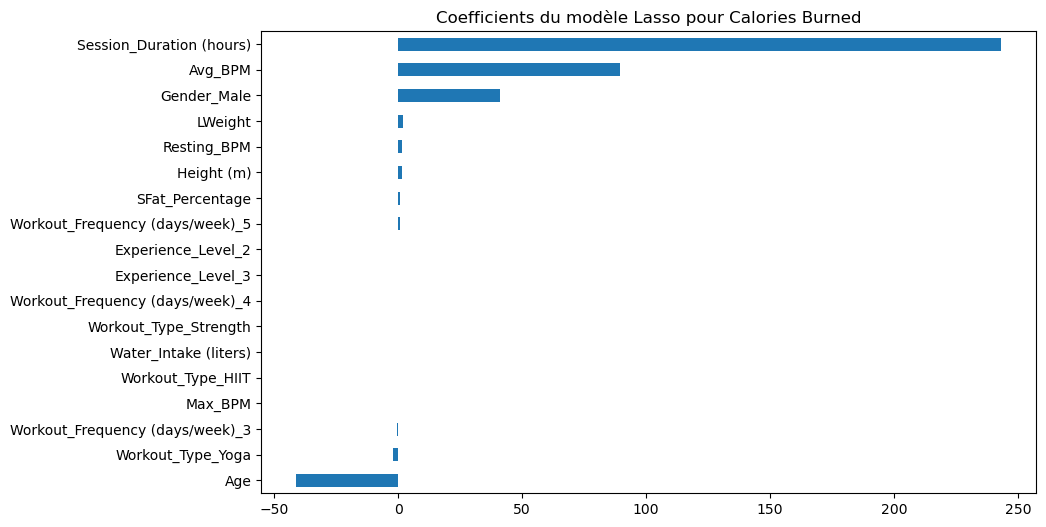

Mean Squared Error (MSE) pour Lasso : 1638.1391021806985


In [ ]:

import matplotlib.pyplot as plt
import numpy as np

# Appliquer Lasso avec validation croisée pour trouver le meilleur alpha
#lasso = LassoCV(cv=5, random_state=1234, max_iter=10000)  # 5-fold cross-validation
lasso = LassoCV(cv=5, alphas=np.array(range(1, 50, 1)) / 20., n_jobs=-1, random_state=13).fit(X_train_calories_scaled, y_train_calories)
lasso.fit(X_train_calories_scaled, y_train_calories)

# Coefficient optimal alpha sélectionné par LassoCV
optimal_alpha = lasso.alpha_
print(f"Optimal alpha: {optimal_alpha}")

# Coefficients du modèle Lasso
coef_calories_lasso = pd.Series(lasso.coef_, index=X_train_calories.columns)

# Afficher les coefficients du modèle Lasso
print("Coefficients du modèle Lasso pour Calories Burned:")
print(coef_calories_lasso)

# Afficher le nombre de variables conservées et éliminées
print(f"Lasso conserve {sum(coef_calories_lasso != 0)} variables et en supprime {sum(coef_calories_lasso == 0)}")

# Tracer les coefficients
coef_calories_lasso.sort_values().plot(kind='barh', figsize=(10, 6))
plt.title('Coefficients du modèle Lasso pour Calories Burned')
plt.show()

# Prédictions avec le modèle Lasso
y_pred_lasso = lasso.predict(X_test_calories_scaled)

# Calcul de l'erreur quadratique moyenne pour évaluer les performances du modèle
from sklearn.metrics import mean_squared_error
mse_lasso = mean_squared_error(y_test_calories, y_pred_lasso)
print(f"Mean Squared Error (MSE) pour Lasso : {mse_lasso}")


# Performances du modèle

- On obtient un MSE = 1638.14. On a donc une légère amélioration par rapport au modèle linéaire non régularisé (MSE=1679.54). Cependant, cette différence minime suggère que la régularisation Lasso réduit légèrement le surapprentissage.Toutefois, Le problème fondamental de non-linéarité (forme en banane des résidus) persiste, limitant les gains de performance.

- On a un alpha optimal = 0.8 :Une pénalité L1 relativement forte, ce qui explique pourquoi 11 variables sur 18 ont été éliminées (coefficients à zéro).

# Interpretation des résultats: 

## Relation Session_Duration - Calories Burned
-On remarque, d'après le graphe, que la variable Session_Duration domine clairement, c'est à dire qu'une augmentation d’1 heure de la durée de la séance entraîne une augmentation prédite de 243 calories brûlée. Donc, plus la séance est longue, plus le corps puise dans ses réserves énergétiques (glycogène et lipides).

Les activités prolongées (ex : cardio, endurance) sollicitent le métabolisme aérobie, favorisant une dépense calorique cumulative.

-Remarque: Ce coefficient élevé pourrait aussi refléter une corrélation indirecte (ex : les séances longues incluent souvent des exercices intenses).

## Différence homme femme 
-  Les hommes brûlent 40.9 calories de plus que les femmes à caractéristiques égales.
    Ceci pourrait être dû au fait que les hommes ont généralement une masse musculaire plus élevée, qui consomme plus de calories au repos et à l’effort.Les différences hormonales (testostérone) favorisent un métabolisme énergétique plus actif.
    
- Remarque: Ce coefficient pourrait aussi refléter des biais comportementaux (ex : les hommes choisissent des entraînements plus intenses non mesurés dans les données).

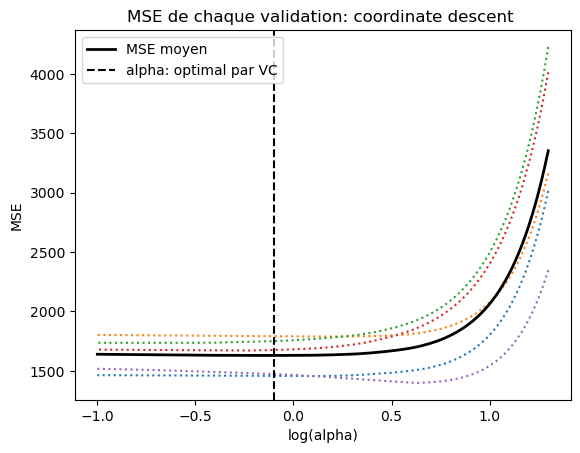

In [ ]:
from sklearn.linear_model import LassoCV, LassoLarsCV
model = LassoCV(cv=5, alphas=np.array(range(1,200,1))/10.,n_jobs=-1,random_state=13).fit(X_train_calories_scaled, y_train_calories)
m_log_alphas = np.log10(model.alphas_)

plt.figure()
# ymin, ymax = 2300, 3800
plt.plot(m_log_alphas, model.mse_path_, ':')
plt.plot(m_log_alphas, model.mse_path_.mean(axis=-1), 'k',
         label='MSE moyen', linewidth=2)
plt.axvline(np.log10(model.alpha_), linestyle='--', color='k',
            label='alpha: optimal par VC')

plt.legend()

plt.xlabel('log(alpha)')
plt.ylabel('MSE')
plt.title('MSE de chaque validation: coordinate descent ')
plt.show()
#le courbe noire correspond à la moyennes des 5 autres
# on decoupe en 5 échantillons d'apprentissage d'ou les 5 courbes 
# Plot the coefficients as a function of -log(alpha)


On remarque une zone où la MSE est relativement basse et stable autour d’un certain intervalle de alpha. Puis, quand alpha devient trop grand (régularisation trop forte), la MSE monte en flèche (le modèle est trop contraint, sous-apprentissage).

À l’opposé, quand alpha est trop petit, la régularisation est quasi nulle : on risque un sur-apprentissage (même si, parfois, la MSE peut rester relativement stable dans cette zone si le dataset n’est pas trop bruyant).

Le point choisi par la validation croisée est un compromis : il vise à réduire le nombre de coefficients non nuls (pour la parcimonie) tout en conservant une bonne performance (basse MSE).

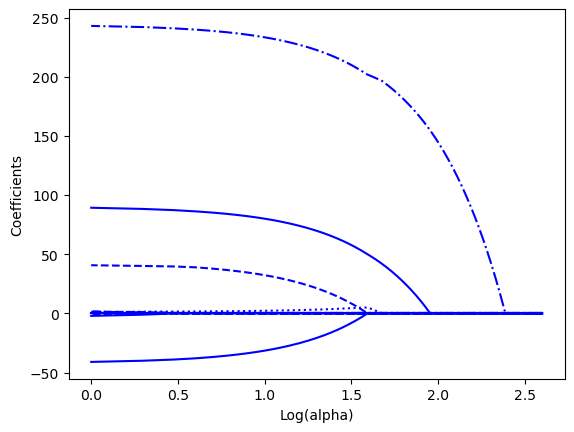

In [ ]:
from itertools import cycle

from sklearn.linear_model import lasso_path
alphas_lasso, coefs_lasso, _ = lasso_path(X_train_calories_scaled, y_train_calories, alphas=np.array(range(1, 400, 1)),)


plt.figure()
ax = plt.gca()

styles = cycle(['-', '--', '-.', ':'])

log_alphas_lasso = np.log10(alphas_lasso)
for coef_l, s in zip(coefs_lasso, styles):
    l1 = plt.plot(log_alphas_lasso, coef_l, linestyle=s,c='b')
plt.xlabel('Log(alpha)')
plt.ylabel('Coefficients')
plt.show()

Le graphique illustre le mécanisme de régularisation L1 propre à la régression Lasso : lorsque le paramètre de régularisation *alpha* augmente, la contrainte de parcimonie s'intensifie, conduisant progressivement les coefficients les moins informatifs vers zéro. Ce comportement est intrinsèque à l'algorithme, qui privilégie un **modèle simplifié** (moins de variables) au détriment d'une légère dégradation de la précision. En d'autres termes, un *alpha* élevé renforce la pénalisation des coefficients, favorisant ainsi un **équilibre optimal entre simplicité interprétative et généralisation**, au prix d'un biais accru. Cela traduit directement le compromis biais-variance au cœur de l'optimisation du modèle.

Après avoir analysé les performances du modèle Lasso et identifié l'alpha optimal pour régulariser notre régression, nous allons maintenant explorer une approche alternative en utilisant la régression par vecteurs de support (SVR) afin de comparer ses performances et sa capacité à capturer des relations potentiellement non linéaires dans les données

### A rajouter un lasso avec des termes quadratiques


### SVR SUR CALORIES BURNED



Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.520 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.524 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.517 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.516 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.497 total time=   0.0s
[CV 1/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.520 total time=   0.0s
[CV 2/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.524 total time=   0.0s
[CV 3/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.517 total time=   0.0s
[CV 4/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.516 total time=   0.0s
[CV 5/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.497 total time=   0.0s
[CV 1/5] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.520 total time=   0.0s
[CV 2/5] END ..C=0.1, gamma=0.01, kernel=linear

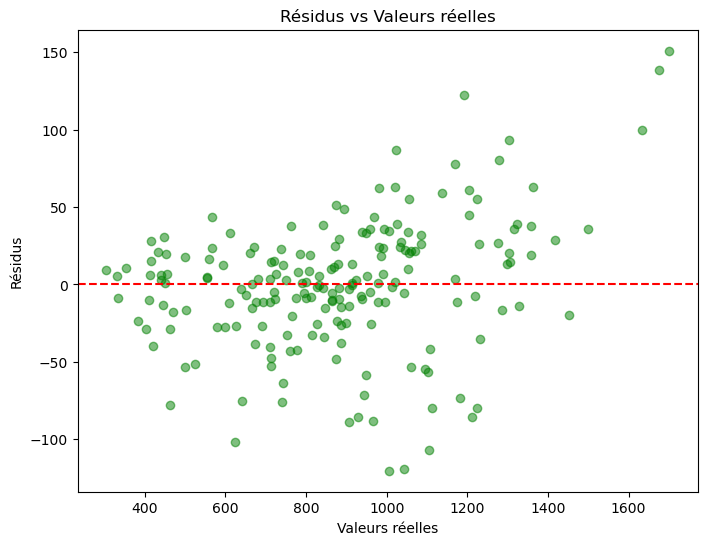

R² pour SVR linéaire: 0.9770559197047974
MSE pour SVR linéaire: 1790.8928193903691


In [ ]:
import pandas as pd
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV



#calibrage des paramètres c et gamma
param = [{'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['linear']}]
parmopt = GridSearchCV(SVR(), param, refit = True, verbose = 3)
parmopt.fit(X_train_calories_scaled, y_train_calories)
print(parmopt.best_params_)

svr_lin = SVR(kernel='linear')
svr_rbf = SVR(kernel='rbf')
svr_poly = SVR(kernel='poly')

svr_lin.fit(X_train_calories_scaled, y_train_calories)
svr_rbf.fit(X_train_calories_scaled, y_train_calories)
svr_poly.fit(X_train_calories_scaled, y_train_calories)

y_pred_svr_lin = svr_lin.predict(X_test_calories_scaled)
y_pred_svr_rbf = svr_rbf.predict(X_test_calories_scaled)
y_pred_svr_poly = svr_poly.predict(X_test_calories_scaled)


#print(len(residuals))
#print(len(y_test_calories))

plt.figure(figsize=(8, 6))
plt.scatter(y_test_calories, residuals, color='green', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Valeurs réelles')
plt.ylabel('Résidus')
plt.title('Résidus vs Valeurs réelles')
plt.show()

from sklearn.metrics import mean_squared_error, r2_score    

# Calculer le coefficient de détermination R²
r2_svr_lin = r2_score(y_test_calories, y_pred_svr_lin)
print(f"R² pour SVR linéaire: {r2_svr_lin}")

# Calculer l'erreur quadratique moyenne (MSE)
mse_svr_lin = mean_squared_error(y_test_calories, y_pred_svr_lin)
print(f"MSE pour SVR linéaire: {mse_svr_lin}")


#plt.plot(y_pred_svr_lin,y_train_calories, 'o', color='red', label='SVR linéaire')







### A rajouter: l'affichage des Y_predicted en fonction des vrais Y
- a revoir également le calibrage des paramètres (pas de gamma dans linear) et des R2 et mSE pour poly et radial

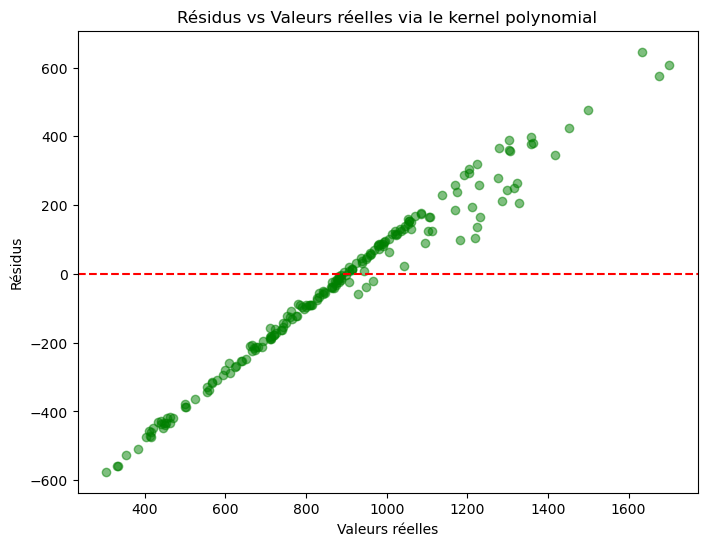

R² pour SVR poly: 0.20835303788371373
MSE pour SVR poly: 61791.74940573677


In [ ]:
residuals_poly= y_test_calories - y_pred_svr_poly

plt.figure(figsize=(8, 6))
plt.scatter(y_test_calories, residuals_poly, color='green', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Valeurs réelles')
plt.ylabel('Résidus')
plt.title('Résidus vs Valeurs réelles via le kernel polynomial')
plt.show()

from sklearn.metrics import mean_squared_error, r2_score    

# Calculer le coefficient de détermination R²
r2_svr_poly = r2_score(y_test_calories, y_pred_svr_poly)
print(f"R² pour SVR poly: {r2_svr_poly}")

# Calculer l'erreur quadratique moyenne (MSE)
mse_svr_poly = mean_squared_error(y_test_calories, y_pred_svr_poly)
print(f"MSE pour SVR poly: {mse_svr_poly}")


# Réseaux de neurones

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
n_features = X_train_calories_scaled.shape[1]
n_hidden = 10

In [25]:
# This line adds a Dense (fully connected) layer to the Keras model.
# - n_hidden: Number of neurons in the hidden layer (10 in this case).
# - input_dim: Specifies the input size (number of features, 64 here).
# - activation='sigmoid': Specifies the activation function for the layer, which is the sigmoid function.
# %load solutions/mlp_keras.py
# build model for regression
keras_model = Sequential([
    Dense(n_hidden, input_dim=n_features, activation='relu'),
    Dense(1)
])


keras_model.compile(optimizer='adam',
                    loss='mse', metrics=['mae'])

history = keras_model.fit(X_train_calories_scaled,y_train_calories, epochs=15, batch_size=32, validation_data = (X_test_calories_scaled, (y_test_calories)))

Epoch 1/15


/home/essakhi/.local/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 935766.1875 - mae: 926.8582 - val_loss: 841166.6250 - val_mae: 873.5513
Epoch 2/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 893504.3750 - mae: 904.6481 - val_loss: 840585.0000 - val_mae: 873.2469
Epoch 3/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 894238.2500 - mae: 906.1094 - val_loss: 839970.4375 - val_mae: 872.9309
Epoch 4/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 927107.6250 - mae: 925.6046 - val_loss: 839324.6875 - val_mae: 872.5963
Epoch 5/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 930099.2500 - mae: 922.7849 - val_loss: 838637.3750 - val_mae: 872.2424
Epoch 6/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 920232.8125 - mae: 918.7200 - val_loss: 837899.3750 - val_mae: 871.8624
Epoch 7/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 920365.5625 - mae: 917.8722 - val_loss: 837095.6875 - val_mae: 871.4495
Epoch 8/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 904128.6875 - mae: 912.2715 - val_loss: 83